In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
matplotlib.rcParams['axes.unicode_minus'] = False
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from PIL import Image

In [6]:
# 1개의 RGB컬러를 변경
with open("tower.jpg","rb") as file:
    # hash코드로 오픈
    img = Image.open(file)
    # 컬러변환
    img = img.convert("RGB")
    # 사이즈 변경
    img = img.resize((28, 28))
    # 배열로 변경
    data = np.asarray(img)
    

In [ ]:
model = keras.models.load_model("best-cnn-model.h5")


In [11]:
# 정확도
score = model.evaluate(val_scaled, val_target)
print("loss accuracy : ",score)

375/375 [==============================] - 2s 7ms/step - loss: 0.2155 - accuracy: 0.9210
loss accuracy :  [0.2155463844537735, 0.9210000038146973]


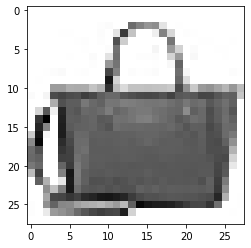

In [12]:
# test데이터 0번 출력
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
# 1번 예측 - 10개의 확률 출력
# 9번이 100% 예측
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.32536399e-18 8.35015756e-22 8.13429189e-22 1.20192056e-17
  1.00110965e-17 3.41908634e-16 2.50674665e-18 3.88434529e-19
  1.00000000e+00 2.14571103e-20]]


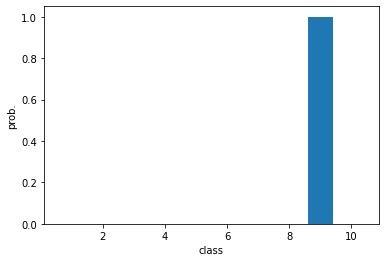

In [14]:
# 1-10까지 막대그래프 출력
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

# 예측 글자 출력 - 최대크기 위치 번호 출력 8 위치
# argmax 배열중 가장 큰 값 위치 출력
print(classes[np.argmax(preds)])

가방


In [16]:
# test데이터 1개 입력데이터 만듬
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 정확도
print(model.evaluate(test_scaled, test_target))

313/313 [==============================] - 3s 8ms/step - loss: 0.2429 - accuracy: 0.9153
[0.2428572028875351, 0.9153000116348267]


In [17]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[3.4860337e-12 2.5274076e-14 5.4005134e-11 3.2107541e-13 3.7346485e-13
  1.7241723e-06 1.1476452e-10 1.0642613e-05 4.3492786e-11 9.9998760e-01]]


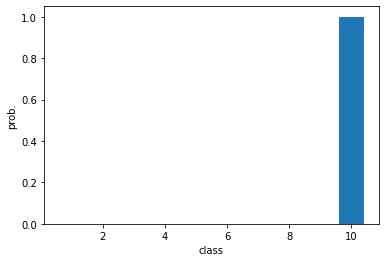

In [18]:
# 1-10까지 막대그래프 출력
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

# 예측 글자 출력 - 최대크기 위치 번호 출력 8 위치
# argmax 배열중 가장 큰 값 위치 출력
print(classes[np.argmax(preds)])

앵클 부츠
